<a href="https://colab.research.google.com/github/ankit986/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/HEALTH INSURANCE CROSS SELL PREDICTION/data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
# df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/Health insurance cross cell prediction/data/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Response'].sum()

46710

In [ ]:
df['Response'].sum()/len(df['Response'])

0.12256336113815208

In [ ]:
# g = sns.PairGrid(df)
# g.map_diag(sns.histplot)
# g.map_offdiag(sns.scatterplot)
# g.add_legend()

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Wrangling


In [ ]:
df.drop(columns=['Driving_License', 'id'], inplace=True)

In [ ]:
#  numeric to categorical
df['Vehicle_Damage'] = df['Vehicle_Damage'].apply(lambda x: 'Y' if(x == "Yes") else 'N')
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x:'Old' if x=='> 2 Years' else 'New' if x=='1-2 Year' else 'Latest')
df['Gender'] = df['Gender'].apply(lambda x:0 if x == 'Male' else 1)
df['Age'] = df['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')

In [ ]:
x = df['Policy_Sales_Channel'].value_counts().apply(lambda x: 'A' if x>100000 else 'B' if 74000<x<100000 else 'C' if 10000<x<=74000 else 'D') 
res = dict(zip(x.keys(),x.values))
df['Policy_Sales_Channel_Categorical'] = df['Policy_Sales_Channel'].map(res) 

x = df['Region_Code'].value_counts().apply(lambda x: 'A' if x>100000 else 'B' if x>11000 and x<340000 else 'C')
res = dict(zip(x.keys(),x.values))
df['Region_Code_Categorical'] = df['Region_Code'].map(res) 
df.Region_Code_Categorical.value_counts()

C    166241
B    108453
A    106415
Name: Region_Code_Categorical, dtype: int64

In [ ]:
categorical_columns = ['Gender', 'Age', 'Region_Code_Categorical', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Policy_Sales_Channel_Categorical']
numerical_columns = ['Annual_Premium_Treated', 'Vintage']
target = 'Response'
len(categorical_columns)+len(numerical_colummns)

9

In [ ]:
Q1=df['Annual_Premium'].quantile(0.25)
Q3=df['Annual_Premium'].quantile(0.75)
IQR=Q3-Q1
# print(Q1)
# print(Q3)
# print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_norm = pd.DataFrame(scaler.fit_transform(df[numerical_colummns]), columns=numerical_colummns)

df_norm

,Annual_Premium_Treated,Vintage
0,0.638245,0.716263
1,0.521510,0.598616
2,0.601797,0.058824
3,0.438540,0.667820
4,0.419591,0.100346
...,...,...
381104,0.464712,0.269896
381105,0.630854,0.418685
381106,0.548205,0.522491
381107,0.708492,0.221453


In [ ]:
df['Vintage'] = df_norm['Vintage']
df['Annual_Premium_Treated'] = df_norm['Annual_Premium_Treated']

In [ ]:
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Sales_Channel_Categorical,Region_Code_Categorical,Annual_Premium_Treated
0,0,YoungAge,28.0,0,Old,Y,40454.0,26.0,0.716263,1,B,A,0.638245
1,0,OldAge,3.0,0,New,N,33536.0,26.0,0.598616,0,B,C,0.521510
2,0,MiddleAge,28.0,0,Old,Y,38294.0,26.0,0.058824,1,B,A,0.601797
3,0,YoungAge,11.0,1,Latest,N,28619.0,152.0,0.667820,0,A,C,0.438540
4,1,YoungAge,41.0,1,Latest,N,27496.0,152.0,0.100346,0,A,B,0.419591


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41f1c39510>,
      dtype=object)

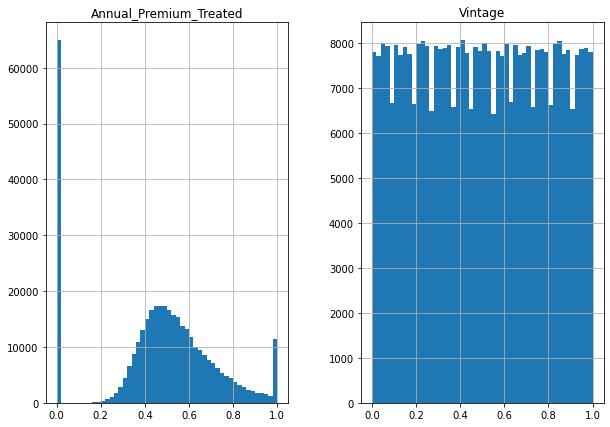

In [ ]:
df_norm[numerical_colummns].hist(bins=50, figsize=(10, 7))
# We can convert policy sales channel to categorical

In [ ]:
df.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Policy_Sales_Channel_Categorical,Region_Code_Categorical,Annual_Premium_Treated
0,0,YoungAge,28.0,0,Old,Y,40454.0,26.0,217,1,B,A,40454.0
1,0,OldAge,3.0,0,New,N,33536.0,26.0,183,0,B,C,33536.0
2,0,MiddleAge,28.0,0,Old,Y,38294.0,26.0,27,1,B,A,38294.0
3,0,YoungAge,11.0,1,Latest,N,28619.0,152.0,203,0,A,C,28619.0
4,1,YoungAge,41.0,1,Latest,N,27496.0,152.0,39,0,A,B,27496.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


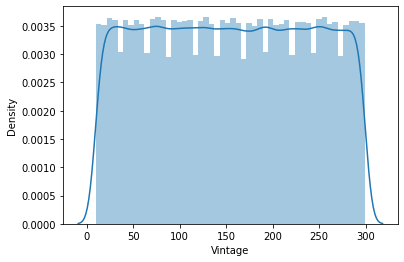

In [ ]:
sns.distplot(df['Vintage'])

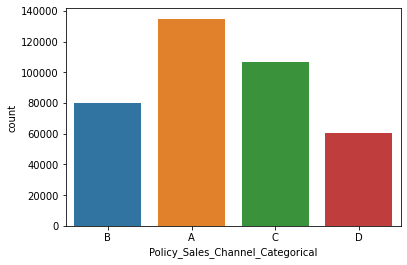

In [ ]:
sns.countplot(data = df, x='Policy_Sales_Channel_Categorical' )

In [ ]:
categorical_columns

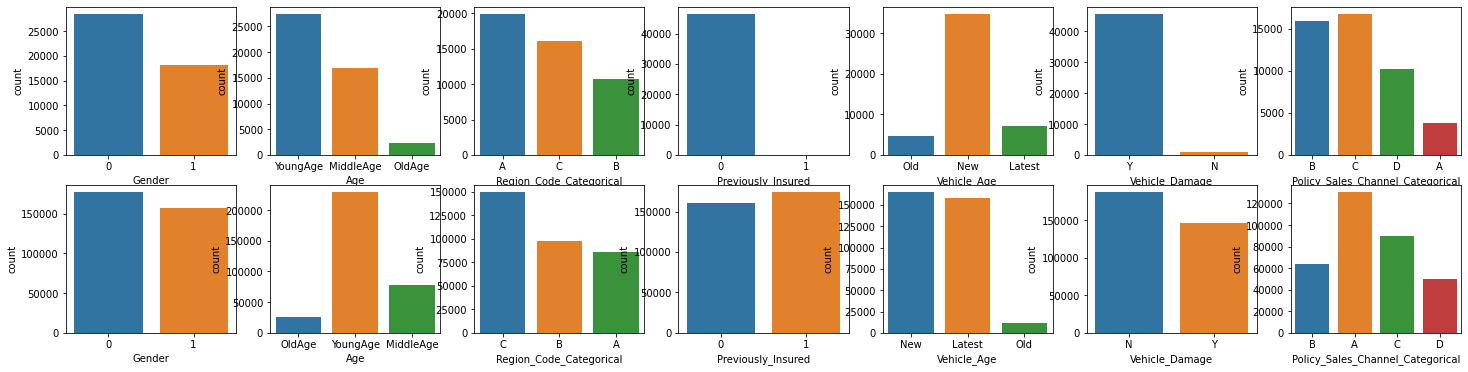

In [ ]:
fig, ax =  plt.subplots(2, 7, figsize=(25, 6))
for i in range(7):
  sns.countplot(data = df[df['Response']==1], x=categorical_columns[i], ax=ax[0][i])
  sns.countplot(data = df[df['Response']==0], x=categorical_columns[i], ax=ax[1][i])


------


------
------
------


ValueError: ignored

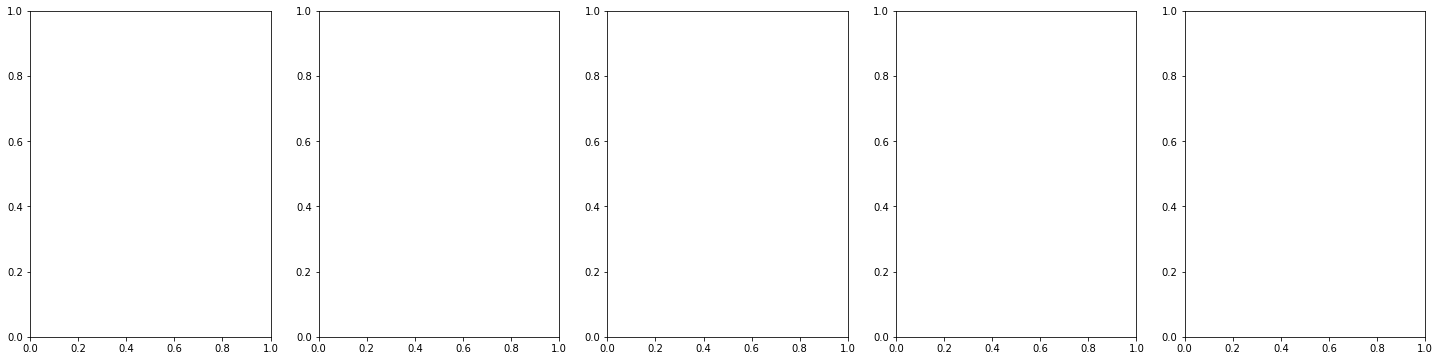

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(25, 6))
df[df['Response']==0][numerical_columns].hist(bins=50, figsize=(10, 7),alpha=0.5, ax=ax)
df[df['Response']==1][numerical_columns].hist(bins=50, figsize=(10, 7),alpha=0.5, ax=ax)

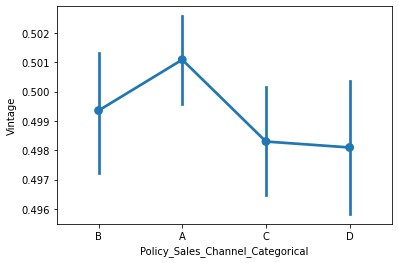

In [ ]:
sns.pointplot(x='Policy_Sales_Channel_Categorical', y='Vintage',data=df)